In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')

Counter-Strike: Global Offensive (CS:GO) is a multiplayer first person shooter game developed by Valve. CS:GO was one of the most popular first person shooter games at the time of its release in 2012, and remains popular today, routinely achieving daily peak player totals above 1 million. In CS:GO there are two teams of 5 players each, the attacking “terrorists” and the defending “counter-terrorists”. 

The goal in reach round for the Terrorists is either to kill all 5 Counter-Terrorists, or plant a bomb at one of two bombsites before the round time is over, and defend it from being defused for 40 seconds. For counter-terrorists the win condition is either to kill all 5 Terrorists, prevent the bomb from being planted for the duration of the round time, or to defuse the bomb at any point after it is planted. There are 7 maps to play on, over 20 unique weapons to choose from, and multiple options for grenades and equipment. 

In our tutorial, use game data scraped from games played on ESEA’ servers. ESEA is a platform that hosts games as a third-party to Valve’s matchmaking service that promotes a more secure anti-cheating program. We aim to use this data to examine which weapons are most successful in winning rounds and killing opponents, analyze how much the overall team’s economy has an effect in them winning a round, and compare how the map that is played has an overall impact on the match. Through these analyses we want to create semi-accurate models that can predict both round and match win percentages. We hope that through this tutorial we are able to provide interesting insights on the important factors to winning in CS:GO, and motivate people to try and pick up the game.

We are using Python 3. We decided to use libraries like pandas and numpy to help us display the csv's and tidy them. We also chose libraries such as seaborn and matplotlib to create graphs of our data. 

First, we picked out certain csv files that we believed would be the most helpful for our project and we picked out a dataset for round times/economy. This dataset also gives us what type of round the winning side had during said round. We named this dataset "round_data". The second csv dataset gives us crucial kill data, and each row in this csv represents a kill during a round. The dataset also gives us information about whether the bomb was planted and what weapons were used to get kills.

We have 2 sets of round and kill data that are synchronized with each other and we split it up so that we can see any trends that are present.

In [3]:
round_data = pd.read_csv("esea_meta_demos.part1.csv", sep=',')
kills = pd.read_csv("esea_master_kills_demos.part1.csv", sep=',')
round_data.head(50)

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
5,esea_match_13770997.dem,de_overpass,6,484.23980,604.5598,Hentai Hooligans,Terrorist,NORMAL,29650,25450
6,esea_match_13770997.dem,de_overpass,7,604.55980,684.2563,Hentai Hooligans,Terrorist,ECO,3200,25300
7,esea_match_13770997.dem,de_overpass,8,684.25630,763.8902,Animal Style,CounterTerrorist,ECO,4850,27600
8,esea_match_13770997.dem,de_overpass,9,763.89020,844.3071,Animal Style,CounterTerrorist,FORCE_BUY,32150,18200
9,esea_match_13770997.dem,de_overpass,10,844.30710,937.0176,Animal Style,CounterTerrorist,ECO,32950,9950


In the above round_data and round_data2 dataset, there are 10 columns. Each column represents:

- File: The name of the demo file
- Map: What map was being played
- Round: What round the data corresponds to (each row represents a round)
- Start_Seconds: What second the round started at
- End_Seconds: What second the round ended at
- Winner_Team: Which team (team name) won the round
- Winner_Side: Which side (Terrorist/Counter Terrorist) won the round
- Round_Type: What kind of round (Pistol, Eco, Semi-Eco, Normal, Force Buy) the winning side had 
- CT_Eq_Val: Counter Terrorist total equpiment value (guns, armor, grenades)
- T_Eq_Val: Terrorist total equpiment value (guns, armor, grenades)

In [16]:
kills.head(116)

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted,round_type
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False,PISTOL_ROUND
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False,PISTOL_ROUND
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False,PISTOL_ROUND
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False,PISTOL_ROUND
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False,PISTOL_ROUND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,esea_match_13770997.dem,15,165015,50.78723,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,Swag7,Heavy,3,2,False,NORMAL
112,esea_match_13770997.dem,15,165345,53.30859,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,AWP,Sniper,3,1,False,NORMAL
113,esea_match_13770997.dem,15,165671,55.86121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,AK47,Rifle,2,1,False,NORMAL
114,esea_match_13770997.dem,15,165811,56.95752,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,AK47,Rifle,2,0,False,NORMAL


In the above kills and kills2 dataset, there are 13 columns. Each column represents:

- File: The name of the demo file
- Round: What round the data corresponds to
- Tick: How long each round lasted in terms of server refresh data
- Seconds: What second the kill was recorded at
- Att_Team: Which team (Team 1 or 2) was attacking
- Vic_Side: Which side suffered the death of one of their players
- Wp: What weapon was used to kill the player
- Wp_Type: What type of weapon the specified gun is 
- Ct_alive: How many Counter Terrorists are alive after the kill
- T_alive: How many Terrorists are alive after the kill
- Is_bomb_planted: Binary representation of whether the bomb is planted at the instant of the kill

The kills dataset has too many 

In [5]:
#kills.drop(['tick'], axis=1, inplace=True)
kills

# We decided to drop tick because we have seconds to measure the length of a round and with tick, it's difficult to 
# read and serves no additional purpose since we have seconds.

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569472,esea_match_13793043.dem,18,178305,50.64319,Team 2,Team 2,CounterTerrorist,CounterTerrorist,Swag7,Heavy,3,2,False
1569473,esea_match_13793043.dem,18,178463,51.87915,Team 1,Team 2,Terrorist,CounterTerrorist,CZ,Pistol,2,2,True
1569474,esea_match_13793043.dem,18,178719,53.88171,Team 1,Team 2,Terrorist,CounterTerrorist,Deagle,Pistol,1,2,True
1569475,esea_match_13793043.dem,18,178905,55.33667,Team 2,Team 1,CounterTerrorist,Terrorist,Swag7,Heavy,1,1,True


## Graphing Weapon Kill Output

   At the core of each match of CS:GO is the weapons that are used by the players. There are over 20 weapons in CS:GO split up into 4 categories: Pistol, SMG, Rifle, and Heavy (Shotguns). Each of these categories, and each unique weapon inside them operate in different ways. SMG’s prioritize faster rates of fire, with their damage output being lower, pistols are less expensive to buy but deal less damage and are not automatic, rifles fire generally slower but have high damage output, and shotguns fire slowly but fire multiple pellets for each shot. We will graph the percentage of kills registered across this data based on the weapon that delivered the kill to see if there are any weapons that are either sparingly used, or used at a higher rate.
    
   With the different properties of each weapon class, it is important to see how often each one is used during a match to see if any weapon class has an advantage or disadvantage.

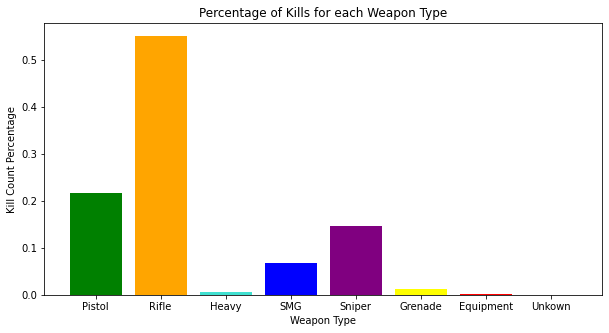

In [6]:
wep_type = []
count = []
colors = ["green", "orange", "turquoise", "blue", "purple", "yellow", "red", "pink"]
x = 0

for weapon in kills["wp_type"].unique():
    wep_type.append(weapon)
    count.append(kills['wp_type'].value_counts()[weapon] / len(kills.index))
plt.figure(figsize = (10,5))
plt.bar(wep_type, count, color=colors)
plt.title('Percentage of Kills for each Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Kill Count Percentage')
plt.show()




#weapon_type = kills["wp_type"].groupby(["wp_type"]).sum()



#mean_payroll = kills["wp_type"].groupby(kills["wp_type"]).mean()
#plot.bar(kills["wp_type"].unique(), mean_payroll)

This graph shows the percentage of all kills logged in our dataframe that were attributed to each weapon type. For general understanding, the Equipment and Unknown bars in this graph can be ignored, as the “weapons” in these categories only produce kills in extremely rare circumstances, and the purpose of these “weapons” is not to get a kill. Through this graph, we can see that over 50 percent of kills were registered with some kind of rifle. This is over double the amount of the next closest weapon type, that being the pistol. On the other end, the heavy (shotgun) weapon type is used an extremely small amount of the time. Although this graph is good at demonstrating the general trend of which type of weapons are mostly used by players, it does not take into account the different scenarios surrounding each round in the game.

In a game of Counter-Strike, there are 30 rounds, with the first team to reach 16 winning the game. Throughout the game, each player builds up a certain amount of cash, through events such as winning a round, losing a round, planting the bomb, killing an enemy, etc. The money that a player has accrued is used for them to purchase weapons, with some weapons being easily purchased, and others being more expensive. When a team does not have enough money to buy their primary weapons of choice, a popular strategy is for that team to “save” their money, purchase very little, in an attempt to be able to purchase those weapons next round. 

Therefore a round in CS:GO can be characterized in many ways: a “normal” round, where a team has enough money to buy their desired weapons, “eco” round, where a team buys next to nothing, “semi-eco” where a team purchases some weapons, but very little, and a “force-buy” round where a team does not have the necessary money to buy what they want, but spends all of their available money anyway. On top of this, there is the beginning “pistol” round where both teams begin the game with little money, and only have money to purchase pistols. Therefore, we want to observe the most commonly used weapons for each round type in CS:GO.

In each weapon category, the difference in price for each individual weapon is very small and does not greatly impact weapon choice inside of a given category, so we will first see which weapons are most commonly used inside each weapon class, and see how the usage of those most popular weapons changes depending on round.

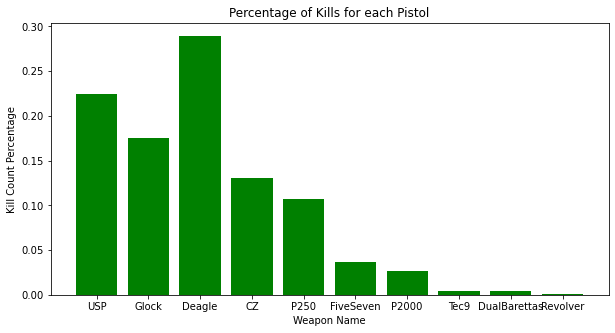

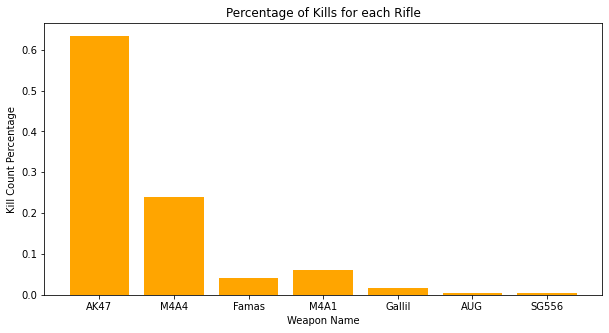

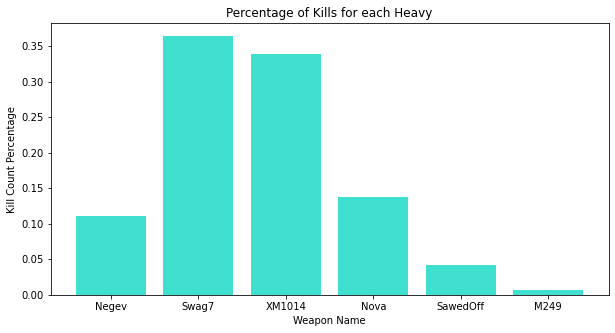

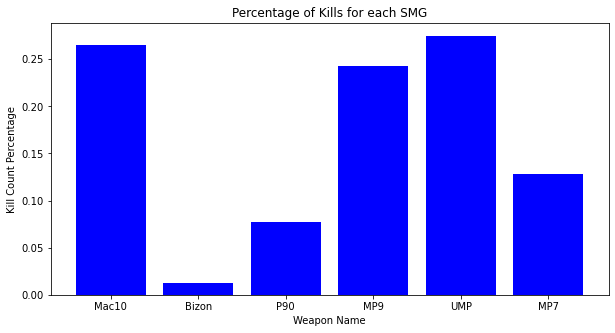

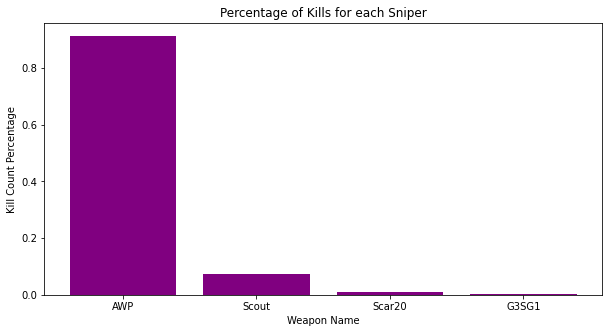

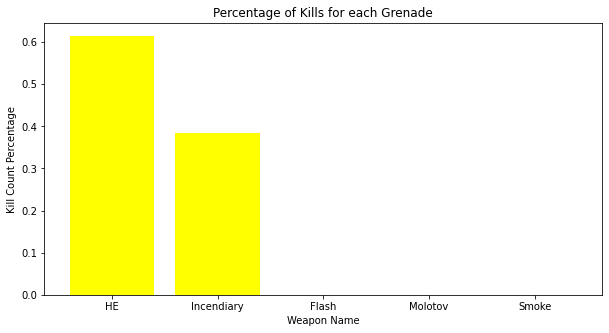

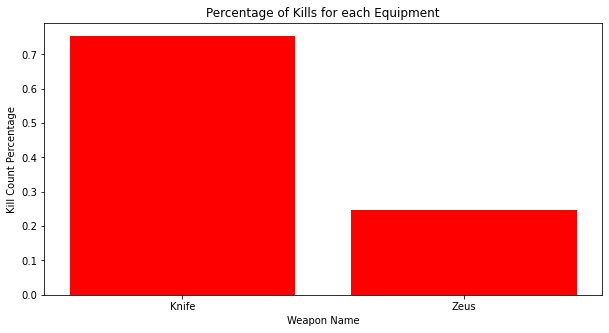

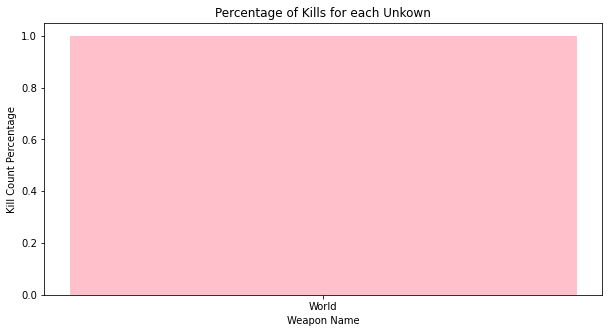

In [7]:
weapons = []
count = []
x = 0

#for weapon in kills["wp_type"].unique():
    #plt.hist(kills.loc[kills["wp_type"] == weapon]["wp"], weights=np.ones(len(kills.loc[kills["wp_type"] == weapon]["wp"])) / len(kills.loc[kills["wp_type"] == weapon]["wp"]), rwidth=.7)
    #plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #plt.show()

#f, ax = plt.subplots(1, 1, figsize=(35,20))
#ax.hist(kills["wp"], bins = len(list(set(kills["wp"]))))

#plt.hist(kills.loc[kills["wp_type"] == weapon]["wp"], weights=np.ones(len(kills.loc[kills["wp_type"] == weapon]["wp"])) / len(kills.loc[kills["wp_type"] == weapon]["wp"]))

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.show()


    #f, ax = plt.subplots(1, 1, figsize=(10,5))
    #ax.hist((kills.loc[kills["wp_type"] == weapon]["wp"]), bins = len(list(set(kills.loc[kills["wp_type"] == weapon]["wp"]))))
    #plt.hist(kills.loc[kills["wp_type"] == weapon]["wp"], weights=np.ones(len(kills.loc[kills["wp_type"] == weapon]["wp"])) / len(kills.loc[kills["wp_type"] == weapon]["wp"]), rwidth=.7)
    #plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #plt.show()

for weapon in kills["wp_type"].unique():
    
    wep_type = []
    count = []
    for specific in kills[kills["wp_type"] == weapon]["wp"].unique():
        wep_type.append(specific)
        count.append(kills['wp'].value_counts()[specific] / kills['wp_type'].value_counts()[weapon])
    plt.figure(figsize = (10,5))
    plt.bar(wep_type, count, color=colors[x])
    plt.title('Percentage of Kills for each ' + weapon)
    plt.xlabel('Weapon Name')
    plt.ylabel('Kill Count Percentage')
    plt.show()
    x += 1
    
    
    #count.append(kills['wp_type'].value_counts()[weapon] / len(kills.index))
    #plt.figure(figsize = (10,5))
    #plt.bar(kills.loc[kills["wp_type"] == weapon]["wp"], kills['wp_type'].value_counts()[weapon], color=("green", "orange", "gray", "blue", "purple", "yellow", "red"))
    #plt.title('Percentage of Kills for each Weapon Type')
    #plt.xlabel('Weapon Type')
    #plt.ylabel('Kill Count Percentage')
    #plt.show()

These graphs show each weapons’ percentage of kills in their weapon category, and through these graphs we can see the weapons that are most popularly used in each category. Despite being in the same class, some weapons are clearly used at higher rates than others, this is due to each weapon having slightly different characteristics to the others in its class, that players may find useful, such as some rifles having a scope to allow a player to zoom in. We discount the Equipment and Unknown weapon types due to the prior reasoning. Grenades are a weapon type that is very cheap in game,  and is purchasable in every round type. As a result, we also discounted Grenades from our by-round analysis. To determine the popularity of the weapon, we selected any weapon that accounted for above 15 percent of its weapon type’s kills to be included. 

In [21]:
# make round_type column inside of kills dataframe
counter = 0
counter2 = 0
counter3 = 0
kills["round_type"] = " "

for row in round_data.index:
    if row == 0:
        kills.at[counter2, "round_type"] = round_data.at[counter, "round_type"]
        counter2 += 1
    else:
        if kills.at[counter2, "round"] == 16 and counter3 < 6:
            kills.at[counter2, "round_type"] = "PISTOL_ROUND"
            counter2 += 1
            counter3 += 1
        else:
            if kills.at[counter2 - 1, "round"] != kills.at[counter2, "round"]:
                counter += 1
                kills.at[counter2, "round_type"] = round_data.at[counter, "round_type"]
                counter2 += 1
            else:
                kills.at[counter2, "round_type"] = round_data.at[counter, "round_type"]
                counter2 += 1
            
kills.head(120)

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted,round_type
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False,PISTOL_ROUND
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False,PISTOL_ROUND
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False,PISTOL_ROUND
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False,PISTOL_ROUND
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False,PISTOL_ROUND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,esea_match_13770997.dem,16,174053,29.41052,Hentai Hooligans,Animal Style,CounterTerrorist,Terrorist,USP,Pistol,5,4,False,PISTOL_ROUND
116,esea_match_13770997.dem,16,174831,35.50244,Hentai Hooligans,Animal Style,CounterTerrorist,Terrorist,USP,Pistol,5,3,False,PISTOL_ROUND
117,esea_match_13770997.dem,16,175729,42.53406,Hentai Hooligans,Animal Style,CounterTerrorist,Terrorist,USP,Pistol,5,2,False,PISTOL_ROUND
118,esea_match_13770997.dem,16,175749,42.69067,Animal Style,Hentai Hooligans,Terrorist,CounterTerrorist,Glock,Pistol,4,2,False,PISTOL_ROUND


We did not have round_data inside of our kills database, so we made a new column for round type. Our round_data dataset is synced up with our kills dataset with the first game in the kills dataset also being the first game in the round data dataset and etc. What we did was we manually matched up the correct round type to each kill by going through each dataset, and setting the round type for each kill in the kills dataset to the equivalent round type for that round in the round_data dataset. Some round types are blank because there were additional games in the kills dataset, so some of the later kills do not have a round type due to the slight difference in dataset sizes.

[0.048715677590788306, 0.03720106288751107, 0.061179299000379606, 0.3492344679235733, 0.13305074022523092, 0.00240415032266228, 0.003732759711501961, 0.018347462988738454, 0.018600531443755536, 0.014741237504745033, 0.13001391876502594]


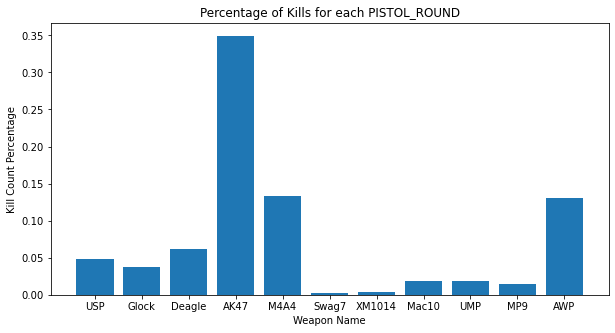

[0.047501525527154385, 0.03601600108481931, 0.06089904400298325, 0.3479693538544986, 0.13514136551630618, 0.0027527289985761747, 0.0022103193436843176, 0.01878093430063055, 0.018957217438470404, 0.015757000474608446, 0.13428707030985151]


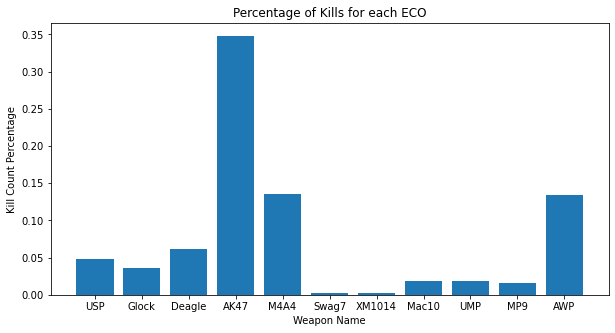

[0.0493952343014413, 0.03396827696096183, 0.05946259143912508, 0.35409574853335263, 0.13616281596291735, 0.003331643369305425, 0.004128340696748027, 0.017527341203737234, 0.018613746650249872, 0.014919968132106902, 0.12515390743825597]


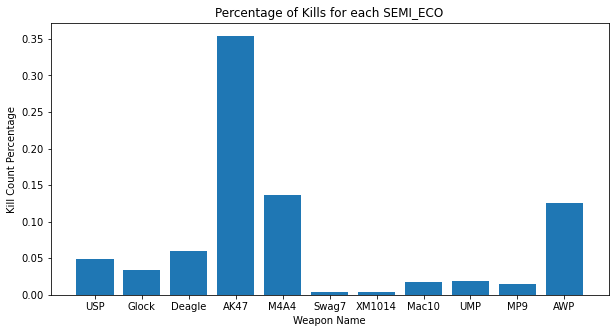

[0.04691801049804416, 0.03770157470662313, 0.05772809842752226, 0.3517959233709643, 0.13112525214251486, 0.0030201379679263575, 0.002139728744803914, 0.01666090871605131, 0.016649764295505454, 0.015713632969653744, 0.13511495469793047]


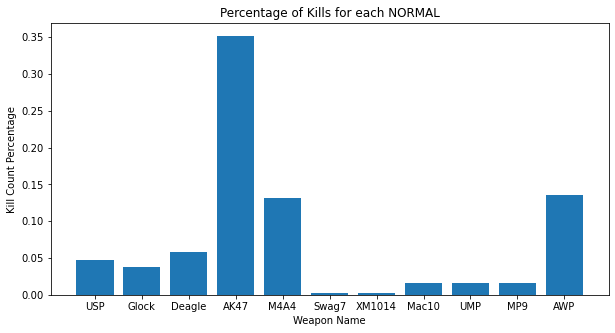

[0.05002190100744634, 0.04077967586508979, 0.06408234778799825, 0.34857643451598774, 0.13210687691633816, 0.002058694699956198, 0.0017082785808147174, 0.017871222076215505, 0.01686377573368375, 0.017082785808147174, 0.13096802452912834]


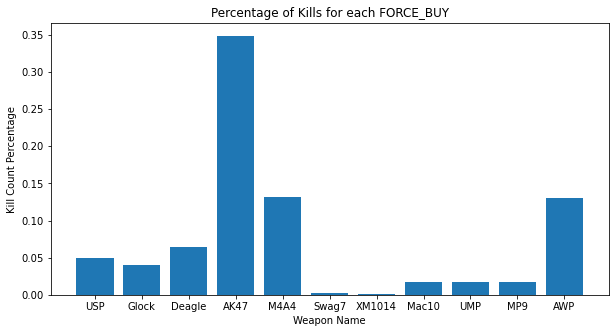

[0.04841831676219268, 0.038037527760169866, 0.06280927747462613, 0.34879406719180117, 0.1312991390099279, 0.0023567516131558454, 0.0022311566996020857, 0.017871417405090878, 0.018594696348438706, 0.016385703457110816, 0.1335546758986316]


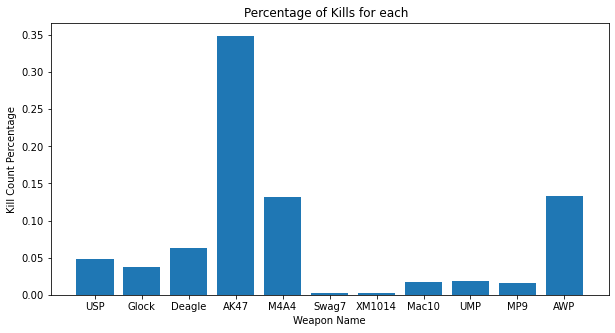

In [22]:
weapons = ["USP", "Glock", "Deagle", "AK47", "M4A4", "Swag7", "XM1014", "Mac10", "UMP", "MP9", "AWP"]
temp = []
r = 0

for roundtype in kills["round_type"].unique():
    count = []
    
    for weapon in weapons:
        count.append(kills[kills["round_type"] == roundtype]['wp'].value_counts()[weapon] / kills['round_type'].value_counts()[roundtype])
    # print(kills[kills["round_type"] == roundtype]["wp"].value_counts()["AWP"])
    print(count)
    temp.append(count)
    plt.figure(figsize = (10,5))
    plt.bar(weapons, temp[r])
    plt.title('Percentage of Kills for each ' + roundtype)
    plt.xlabel('Weapon Name')
    plt.ylabel('Kill Count Percentage')
    r += 1
    plt.show()

These results are not possible, demonstrated by the fact that in a Pistol Round, weapons like an AWP and an AK-47 cannot be purchased as they are wildly more expensive the money that players start a game with. This seems to be due to several missing rounds in the round database, which despite us trying to account for when spotting some of these skipped rounds, it is impossible for us to account for all of these inconsistencies, and this resulted in some rounds being misclassified. Therefore we cannot conclude any findings regarding weapon usage in different rounds, due to slightly misaligned database errors. 

Our final conclusions regarding weapons in CS:GO, despite not being able to make any statements regarding specific rounds, is that rifles, in particular the AK-47, were overwhelmingly used more in getting kills in games. This is supported by the fact that the AK-47 is only available on the terrorist side, which given it’s more limited availability when compared to other weapons that are always available, shows that the AK-47 was used near exclusively by the terrorist side. On top of this, the heavy class was used incredibly sparingly, with the highest shotgun kill percentage being the Swag7 at less than 1 percent, which is on par with the lowest rifle kill percentage (SG 553). FInally, for each weapon class, although there were clear favorites among players, there seemed to be good balance, with usually 2-3 weapons from each class seeing significant usage.

## Predicting Round Win/Loss based on Round Characteristics

Kills play a massive part in determining who wins the round/match in CS:GO. One of the win conditions for both sides is eliminating the whole enemy side, and kills enable each side to more easily complete their round objective to win. Despite this, kills are not the only factor when it comes to determining who wins a round. Other factors, such as how long the round took, how much money each team had to begin the round, which side the team is on, and whether the bomb was planted during the round play a crucial role as well. We aim to use these many factors to help create a model that can accurately predict round win/loss.

Round Time:

There is a timer for each round in Counter-Strike, and each round takes a certain amount of seconds from the round start to the round end. THere are several phases to a counter-strike round, starting with a 15 second “freeze time” period where teams can purchase their weapons and equipment. The “main round” has a 1 minute and 55 second timer, where if the terrorist side cannot eliminate the counter-terrorist side or plant the bomb, then they lose the round and the round ends. If the bomb is planted at any point, the round shifts to a “post-plant” phase, where there are 40 seconds for the counter-terrorists to try and defuse the bomb. Regardless of if the round enters the post-plant phase or not, there is a 3-5 second ending phase after the round result has been decided before the next round starts. As a result of the round timer that the terrorist team must work in, there are many different strategies for the terrorist side to try and win the round, from taking their time in planting the bomb, to trying to immediately start fighting. We want to try and see the optimal round time taken to win a round as the terrorist side.

In [24]:
round_data["total_time"] = round_data["end_seconds"] - round_data["start_seconds"]
round_data

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val,total_time
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250,66.65128
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400,118.44070
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250,61.60860
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400,94.41750
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550,48.81390
5,esea_match_13770997.dem,de_overpass,6,484.23980,604.5598,Hentai Hooligans,Terrorist,NORMAL,29650,25450,120.32000
6,esea_match_13770997.dem,de_overpass,7,604.55980,684.2563,Hentai Hooligans,Terrorist,ECO,3200,25300,79.69650
7,esea_match_13770997.dem,de_overpass,8,684.25630,763.8902,Animal Style,CounterTerrorist,ECO,4850,27600,79.63390
8,esea_match_13770997.dem,de_overpass,9,763.89020,844.3071,Animal Style,CounterTerrorist,FORCE_BUY,32150,18200,80.41690
9,esea_match_13770997.dem,de_overpass,10,844.30710,937.0176,Animal Style,CounterTerrorist,ECO,32950,9950,92.71050


We have the start_seconds column and end_seconds column for each round, so we created a column where we subtracted the start_seconds from end_seconds and that gives us the total_time column.

In [44]:
print(round_data["total_time"].min())
bins = [29, 40, 60, 90, 120, 150, 180]
group_names = ['29-40', '41-60', '61-90', "91-120", "121-150", "151-180"]
round_data['categories'] = pd.cut(round_data['total_time'], bins, labels=group_names)
round_data

win = "Terrorist"
categories = []
win_loss = []

for category in round_data["categories"].unique():
    categories.append(category)
    win_loss.append(round_data[round_data['categories'] == category]["winner_side"].value_counts()[win])




29.730999999999995


KeyError: 'Terrorist'